# Proyecto 7 Bootcamp de Ciencia de Datos e Inteligencia Artificial

**Presentado por Nicolás Rubio García**

# Análisis de Sentimientos en Reseñas de Aplicaciones de la Google Play Store

Este proyecto utiliza procesamiento de lenguaje natural (PLN) para realizar un análisis de sentimientos a las reseñas de las aplicaciones de Google Play Store. Bajo esta idea, se ha desarrollado un modelo de clasificación que puede predecir si una reseña es positiva, neutral o negativa.

## Descripción del Proyecto
El proyecto consta de los siguientes componentes:

**Dataset**: Se utiliza un conjunto de datos que contiene reseñas de aplicaciones de la Google Play Store, junto con sus calificaciones y otros detalles, extraido de Kaggle.

**Preprocesamiento de Datos**: Se realizan tareas de limpieza y preprocesamiento en el texto de las reseñas, que incluyen la eliminación de caracteres especiales, tokenización, eliminación de stopwords y lematización.

**Entrenamiento del Modelo**: Se entrena un modelo de clasificación utilizando algoritmos de aprendizaje automático como Naive Bayes.

**Despliegue de la API**: Se crea una API web utilizando Flask que permite enviar reseñas y recibir la predicción de sentimiento correspondiente.

## Análisis y preprocesamiento de datos

In [26]:
#=====================================
#    1. Importar paquetes básicos
#=====================================
import pandas as pd
import numpy as np

#------------------------------------------------------------------------------------------------------------#

#================================================
#    2. Análisis y procesamiento de datos
#================================================

#        2.1. Cargar los datos
#---------------------------------------

df = pd.read_csv('googleplaystore_user_reviews.csv')

#     2.2. Visualizar el dataframe
#---------------------------------------

print('Dataframe original:','\n\n',df.head(),'\n\n')

#    2.3. Información del dataframe
#---------------------------------------

print('\n\n',df.info(),'\n\n')

#   2.4. Verificar valores faltantes
#---------------------------------------

print(df.isnull().sum(),'\n\n')

# 2.5. Eliminar filas con valores faltantes
#------------------------------------------

df.dropna(inplace=True)

# 2.6. Filtrar las columnas necesarias (Texto de la reseña y Sentimiento)
#-----------------------------------------------------------------------------

df = df[['Translated_Review', 'Sentiment']]

# 2.7. Visualizar las primeras filas después del filtrado
#---------------------------------------------------

print('Dataframe filtrado:',df.head())


Dataframe original: 

                      App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count

El DataFrame original contiene información sobre reseñas de aplicaciones en la Play Store, donde cada fila representa una reseña. Sin embargo, se observa que hay valores faltantes en las columnas `Translated_Review` y `Sentiment`. 

Por otro lado, la columna `Sentiment` representa el sentimiento asociado a cada reseña, que puede ser positivo, negativo o neutro. La columna `Sentiment_Polarity` representa la polaridad del sentimiento en un rango de -1 a 1, donde valores más cercanos a 1 indican un sentimiento positivo y valores más cercanos a -1 indican un sentimiento negativo. 

La columna `Sentiment_Subjectivity` representa la subjetividad del sentimiento en un rango de 0 a 1, donde valores más cercanos a 1 indican una subjetividad alta.

Además, se procede a filtrar el DataFrame para eliminar las filas con valores faltantes en las columnas relevantes (`Translated_Review` y `Sentiment`), por lo que se observa las reseñas filtradas junto con su sentimiento asociado, permitiendo una comprensión más clara de las reseñas disponibles y los sentimientos correspondientes.

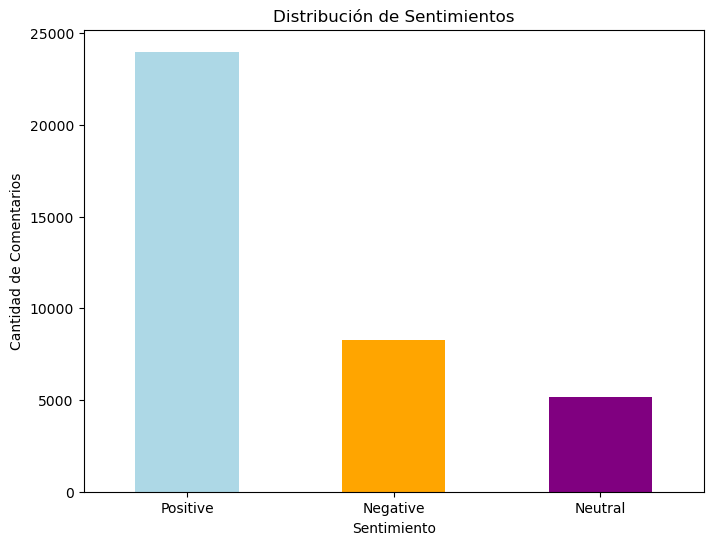

In [27]:
# 2.8. Distribución de sentimientos
#----------------------------------

import matplotlib.pyplot as plt

#   Cantidad de comentarios por sentimientos
#------------------------------------------------

sentiment_counts = df['Sentiment'].value_counts()

#         Crear el gráfico de barras
#-------------------------------------------------
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['lightblue', 'orange', 'purple'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0)
plt.show()



El gráfica de barras permite ver la distribución de los sentimientos en el dataframe filtrado, donde la mayoría de las reseñas tienen un sentimiento positivo, con un total de 23.998, lo que sugiere que la mayoría de los usuarios tienen una opinión favorable sobre las aplicaciones. 

Por otro lado, hay un número significativo de reseñas clasificadas como negativas (8.271), indicando que también hay usuarios que expresan opiniones desfavorables sobre las aplicaciones. 

Por último, hay 5.158 reseñas clasificadas como neutrales, lo que sugiere que algunos usuarios pueden no tener una opinión clara o no expresar un sentimiento específico en sus reseñas.

Esto implica que hay un desbalance en los datos propios de la naturaleza de las opiniones.

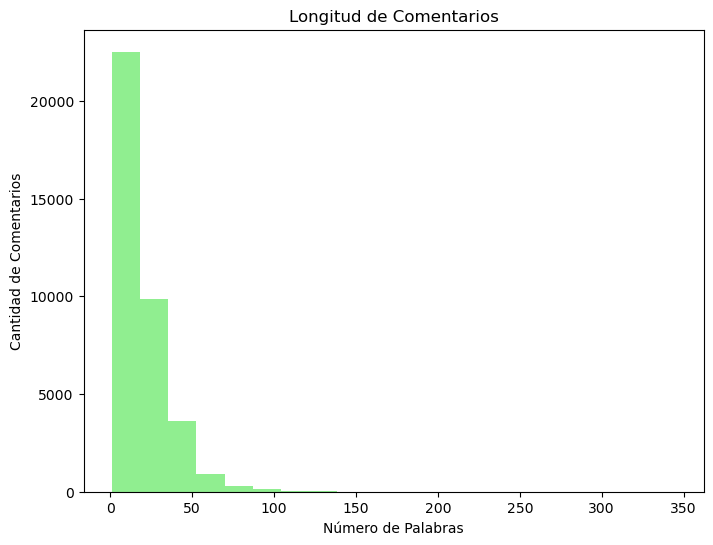

In [28]:
# 2.9. Longitud de los comentarios
#----------------------------------

#         Longitud de cada comentario
#------------------------------------------------

comment_lengths = df['Translated_Review'].apply(lambda x: len(x.split()))

#          Histograma de la longitud
#-------------------------------------------------
plt.figure(figsize=(8, 6))
plt.hist(comment_lengths, bins=20, color='lightgreen')
plt.title('Longitud de Comentarios')
plt.xlabel('Número de Palabras')
plt.ylabel('Cantidad de Comentarios')
plt.show()

El histograma permite ver la distribución de los datos de la longitud de los comentarios, la cual varía desde un mínimo de 2 palabras hasta un máximo de 350. 

Al observar la distribución de la longitud se puede notar que la mayoría de los comentarios son relativamente cortos, con la mayoría de ellos teniendo entre 2 y 30 palabras. De modo que hay una cantidad menor de comentarios con longitud mayor a esta cantidad de palabras, la cual se vuelve mínima cuando sobrepasan las 50 palabras. 

Esto sugiere que, si bien la mayoría de los usuarios expresan sus opiniones de manera concisa, también hay algunos que proporcionan comentarios más detallados y extensos.

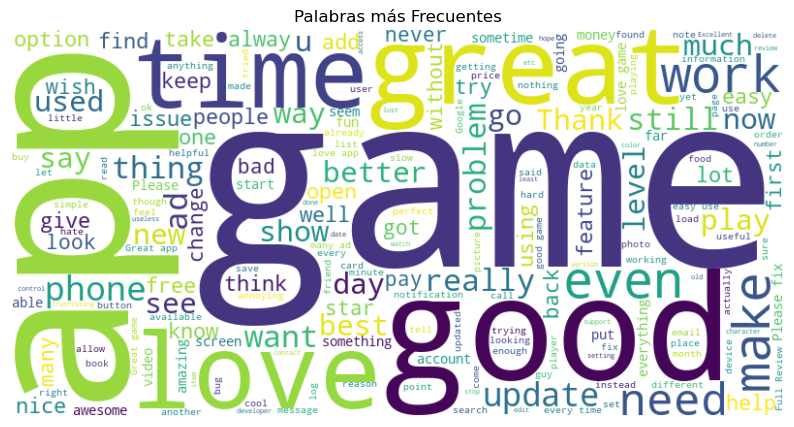

In [29]:
# 2.10. Nube de palabras
#----------------------------------

from wordcloud import WordCloud

# Cadena con todos los comentarios preprocesados
#-----------------------------------------------

all_comments = ' '.join(df['Translated_Review'])

#        Creación de la nube de palabras
#-----------------------------------------------
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

#                Nube de palabras
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más Frecuentes')
plt.show()


Mediante la nube de palabras se puede observar las palabras más utilizadas en los comentarios, donde se ve que destacan las palabras *app* y *game*, lo que puede implicar que la mayoría de las apps comentadsas son videojuegos. Ademas, como se destacó de la primer gráfica, las reseñas positivas predominan en la muestra, puesto que las palabras *good*, *love* y *great* también destacan con una frecuencia importante y no se ven muchas palabras negativas en la nube.

## Preprocesamiento de texto

La sección de preprocesamiento de texto es de los pasos más importantes para realizar este análisis, ya que asegura que todos los textos estén listos para entrar al modelo. 

Primero, se convierte el texto a minúsculas y se eliminan cualquier carácter no alfabético, como los emojis.

Después, se tokenizan, es decir, se separan individualmente para mejorar la comprensión.

Luego, se retiran aquelas palabras que no aportan mucho significado al análisis, lo que llamamos las palabras vacías o "stopwords".

Después de eso, se preparan las palabras para estar casi listas para entrar al modelo, como cuando se cortan los ingredientes en la cocina, lo que se conoce como lematizar las palabras, donde se reducen las palabras a su forma base o raíz.

Finalmente, se aplica la función de preprocesamiento al texto, donde se prepara el texto de la mejor manera posible para que pueda ser utilizado en el análisis de sentimientos. 

El resultado de este proceso puede verse en el nuevo dataframe:

In [ ]:
#================================================
#        3. Preprocesamiento de texto
#================================================

#     3.1. Paquetes necesarios
#------------------------------------
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# 3.2. Función para preprocesar el texto
#----------------------------------------

def preprocess_text(text):
    # Convertir texto a minúsculas
    text = text.lower()
    # Eliminar caracteres no alfabéticos
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar palabras vacías (stopwords)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lematizar las palabras
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Unir tokens en una sola cadena
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


#     3.3. Aplicar la función de preprocesamiento
#------------------------------------------------------

df['Preprocessed_Review'] = df['Translated_Review'].apply(preprocess_text)



In [31]:
df['Preprocessed_Review']

0        like eat delicious food thats im cooking food ...
1               help eating healthy exercise regular basis
3                work great especially going grocery store
4                                              best idea u
5                                                 best way
                               ...                        
64222    ad older many agent much owner posted detail r...
64223    photo posted portal load fit purpose im sure s...
64226    dumb app wanted post property rent give option...
64227    property business got link sm happy performanc...
64230    useless app searched flat kondapur hyderabad n...
Name: Preprocessed_Review, Length: 37427, dtype: object

## Entrenamiento del modelo

El entrenamiento de un modelo es como la construcción de un puente.

Primero, se recolectan los materiales necesarios, que en este caso son los datos preprocesados y etiquetados.

Luego, se dividen los datos en un conjunto de entrenamiento y otro de prueba. Esto es como diseñar las maquetas del puente antes de comenzar la construcción real.

Después, se transforman los datos en una forma que nuestro modelo pueda entender. En este caso se utilizan técnicas como TF-IDF para convertir el texto en números, es decir, en un idioma que la máquina pueda entender.

A continuación, se selecciona el algoritmo de aprendizaje, que es como elegir el tipo de construcción del puente. En este caso se escogió un algoritmo de Naive-Bayes, que se conoce por su efectividad en conjuntos de datos pequeños y medianos.

Se entrena el modelo con los datos de entrenamiento, similar a comenzar la construcción del puente según los planos diseñados, utilizando los datos de entrenamiento para ajustar los parámetros del modelo y mejorar su capacidad para predecir con precisión.

Una vez que el modelo está entrenado, se valida con datos de prueba que no ha visto antes. Es como probar la resistencia y la estabilidad del puente con pruebas de carga, ya que el puente no debe caerse cuando pasen vehículos.

Finalmente, se evalúa el rendimiento del modelo utilizando métricas, que es como inspeccionar el puente terminado para asegurarse de que cumpla con los estándares de seguridad y calidad establecidos, que se pueden ver a continuación:

In [32]:
#================================================
#         4. Entrenamiento del modelo
#================================================

#             4.1. Paquetes necesarios
#----------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#       4.2. Conjuntos de entrenamiento y de prueba
#------------------------------------------------------------

X = df['Preprocessed_Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#       4.3. Vectorizar el texto por medio de TF-IDF
#------------------------------------------------------------

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#        4.4. Clasificador multinoimal Naive Bayes
#------------------------------------------------------------

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)

#              4.5. Realizar predicciones
#------------------------------------------------------------
y_pred = nb_classifier.predict(X_test_vect)

#              4.6. Evaluación del modelo
#------------------------------------------------------------
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.90      0.41      0.57      1653
     Neutral       0.85      0.09      0.17      1049
    Positive       0.71      0.99      0.83      4784

    accuracy                           0.74      7486
   macro avg       0.82      0.50      0.52      7486
weighted avg       0.77      0.74      0.68      7486



In [33]:
#================================================
#         5. Validación del modelo
#================================================

#      5.1. Prueba del modelo Naive Bayes
#------------------------------------------------

test_text = "This app is amazing!"

#          5.2. Preprocesar el texto
#-------------------------------------------------

preprocessed_test_text = preprocess_text(test_text)

#          5.3. Vectorizar el texto
#-------------------------------------------------
test_text_vectorized = vectorizer.transform([preprocessed_test_text])

#          5.4. Realizar la predicción
#-------------------------------------------------
predicted_label = nb_classifier.predict(test_text_vectorized)[0]

#          5.5. Etiquetas de predicción
#-------------------------------------------------
sentiment_mapping = {
    'Negative': 'Negativo',
    'Positive': 'Positivo',
    'Neutral': 'Neutral'
}

predicted_sentiment = sentiment_mapping.get(predicted_label, "Desconocido")
print("Sentimiento predicho para '{}': {}".format(test_text, predicted_sentiment))

#     5.4. Calcular la probabilidad de cada clase para el texto
#--------------------------------------------------------------------
probabilities = nb_classifier.predict_proba(test_text_vectorized)[0]

#        5.5. Obtener la probabilidad de la clase "Positive"
#---------------------------------------------------------------------
positive_probability = probabilities[nb_classifier.classes_ == "Positive"][0]

print("Probabilidad de la clase 'Positive': {:.2%}".format(positive_probability))

Sentimiento predicho para 'This app is amazing!': Positivo
Probabilidad de la clase 'Positive': 95.88%


## Guardar el modelo

Finalmente se guarda el modelo para ser utilizado en un entorno real mediante la conexión con otros sitios o aplicaciones, lo que se realiza por medio de una API REST.

In [34]:
#================================================
#      6. Guardar el modelo y vectorizador
#================================================

import joblib

joblib.dump(nb_classifier, 'sentiment_analysis_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [36]:
!jupyter nbconvert --to html Proyecto_M7.ipynb --no-input --no-prompt

[NbConvertApp] Converting notebook Proyecto_M7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 732910 bytes to Proyecto_M7.html
